<br>

<b><font size=22> Big data and Marketing </font></b>

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>GNABA Ange - Michel</font>**

**<font color = salmon>MASTER 2 EBDS</font>**


In [288]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer # preserves the root of words so that two words with the same stem will be considered as one and the same word
from nltk.stem.snowball import SnowballStemmer
#import re

In [274]:
link_file = "https://raw.githubusercontent.com/lilyhuong/Bigdata-and-marketing/e270465ec5686145b9f0f5f6b67e535e649ac72a/data.csv?token=GHSAT0AAAAAAB23GAORQE4WNWOEKWS66FEMY3UD2QQ"
df = pd.read_csv(link_file, index_col= 0)

In [275]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
50143,GoodMorningWilton,"Wilton, CT 06897","#WiltonCT's go-to news source. Daily, GOOD new...",2013-04-03 19:13:57,1234,451,765,False,2020-07-31 17:34:35,"Analyzing School Reopening Details, Wilton BOE...",NaN,TweetDeck,False
52558,Mitchel Bell,Washington DC Metro,Uber sales guy - Hunter - Focus is on sales pe...,2010-02-20 19:28:20,83,92,7,False,2020-08-01 19:00:19,NICE Satmetrix Benchmark finds 57% of contact ...,NaN,Oktopost,False
3866,PIB India,New Delhi,Press Information Bureau. Nodal agency for com...,2010-12-27 11:55:36,2063891,265,2149,True,2020-07-25 10:05:16,"#CoronaWatch\n\n◾ 13,36,861 total confirmed ca...",['CoronaWatch'],Twitter Web App,False
67077,Daniel Mumby,Chard,"Christian, journalist, film buff, cricket fan ...",2012-07-08 15:15:19,678,981,8961,False,2020-08-04 07:52:32,"""XR f***s up so often because we became way to...",NaN,Twitter for Android,False
153918,Jimmy Kokinakes,"Kankakee, IL","There are no small audiences, only small comic...",2014-05-31 18:52:32,1112,2081,8843,False,2020-08-18 16:17:44,@realDonaldTrump America's most DISGRUNTLED EM...,['COVID19'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114102,Dan Male,"London, England","Editor of @ICJnews, @TalentJournal and @WMJnew...",2016-07-17 14:10:57,164,484,1276,False,2020-08-12 07:31:15,Karamjit is absolutely right to talk about the...,['NHS'],Twitter for iPhone,False
67848,The New Indian Express,Chennai,All the tweets for breaking news & views.\nFac...,2009-12-05 09:24:55,446499,552,540,True,2020-08-04 07:28:56,UN chief says over one billion students are af...,['COVID19'],Twitter Web App,False
142615,Diamond Q,"Oklahoma City, OK",👀 follow or you gay,2020-06-21 01:56:52,18,15,29,False,2020-08-17 06:59:50,Follow or you gay 👀 #DarceyAndStacey #PValley ...,"['DarceyAndStacey', 'PValley', '90DayFianceHap...",Twitter for iPhone,False
61053,Richard herlihy,NaN,NaN,2013-05-04 20:35:52,86,392,177,False,2020-08-02 20:36:26,@L5Roby @ChristianDMZ @andifasano @meliswein @...,['Mets'],Twitter for iPhone,False


In [276]:
#df = df.sample(frac=0.03 , random_state = 123)

In [277]:
df = df[['user_name', "text", "hashtags", "is_retweet"]]

In [278]:
df.dtypes

user_name     object
text          object
hashtags      object
is_retweet      bool
dtype: object

## Exploratory Data Analysis

In [279]:
df.drop_duplicates(subset='text',inplace=True)

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_88069/1356646241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='text',inplace=True)


From this step, we haad remove 425 duplicate tweet that duplicate 

In [280]:
df.shape

(5373, 4)

In [281]:
df.describe()

,user_name,text,hashtags,is_retweet
count,5373,5373,3806,5373
unique,4782,5373,2169,1
top,GlobalPandemic.NET,"Analyzing School Reopening Details, Wilton BOE...",['COVID19'],False
freq,21,1,1132,5373


<AxesSubplot:xlabel='is_retweet', ylabel='count'>

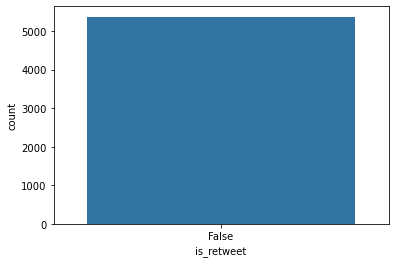

In [282]:
sns.countplot(x = 'is_retweet', data = df)

### Count number of current word in a tweet 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


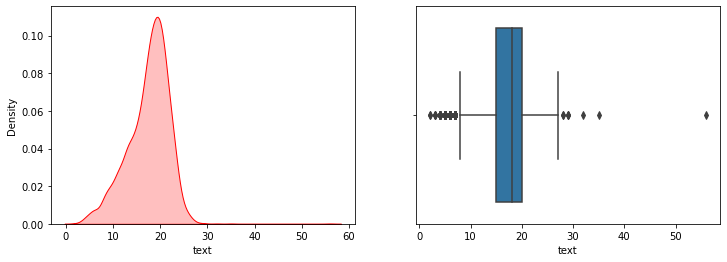

In [283]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['text'].str.count(' ') + 1,color='r',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df['text'].str.count(' ') + 1)
plt.show()

In [284]:
(df['text'].str.count(' ') + 1).mean()

17.415038153731622

In [285]:
nltk.download('stopwords')
nltk.download('punkt') # tokenizer divides a text into a list of sentences by using an unsupervised algorithm 
                        #to build a model for abbreviation words, collocations, and words that start sentences
nltk.download('words') # word from an english dictionnary 
nltk.download('wordnet')   #another NLTK corpus reader

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilyhuong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lilyhuong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/lilyhuong/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lilyhuong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* transform tweet text into lowercase
* remove twitter handles (remove the user name)
* remove hyperlinks
* remove non-alphanumeric characters such as punctuation marks:  period, comma, apostrophe, quotation, question, exclamation, brackets, braces, parenthesis, dash, hyphen, ellipsis, colon, semicolon
* remove whitespace

Start from removing the stopwords — auxiliary words that can be ignored

list of stopwords together with a couple of works such as retweet (‘rt’)

In [238]:
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)
lemmatizer = WordNetLemmatizer()  
stemmer = SnowballStemmer("english")  # transform knowing to know, ed to none

In [291]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lilyhuong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [292]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])\
          .apply(lambda x: [lemmatizer.lemmatize(i) for i in x])\
          .apply(lambda x: [stemmer.stem(i) for i in x])\
          .apply(lambda x: [i for i in x if not i.isdigit()])

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_88069/408282796.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['text'].str.lower()\
/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_88069/408282796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].str.lower()\


In [293]:
df

,user_name,text,hashtags,is_retweet,processed_text
50143,GoodMorningWilton,"Analyzing School Reopening Details, Wilton BOE...",NaN,False,"[analyz, school, reopen, detail, wilton, boe, ..."
52558,Mitchel Bell,NICE Satmetrix Benchmark finds 57% of contact ...,NaN,False,"[nice, satmetrix, benchmark, find, contact, ce..."
3866,PIB India,"#CoronaWatch\n\n◾ 13,36,861 total confirmed ca...",['CoronaWatch'],False,"[coronawatch, total, confirm, case, case, cure..."
67077,Daniel Mumby,"""XR f***s up so often because we became way to...",NaN,False,"[xr, f, often, becam, way, big, quick, none, u..."
153918,Jimmy Kokinakes,@realDonaldTrump America's most DISGRUNTLED EM...,['COVID19'],False,"[america, disgruntl, employe, donald, trump, t..."
...,...,...,...,...,...
114102,Dan Male,Karamjit is absolutely right to talk about the...,['NHS'],False,"[karamjit, absolut, right, talk, role, local, ..."
67848,The New Indian Express,UN chief says over one billion students are af...,['COVID19'],False,"[un, chief, say, one, billion, student, affect..."
142615,Diamond Q,Follow or you gay 👀 #DarceyAndStacey #PValley ...,"['DarceyAndStacey', 'PValley', '90DayFianceHap...",False,"[follow, gay, darceyandstacey, pvalley, 90dayf..."
61053,Richard herlihy,@L5Roby @ChristianDMZ @andifasano @meliswein @...,['Mets'],False,"[break, news, met, gm, brodi, van, wagenen]"


In [178]:
# def preprocessSentence(sentence):
#     sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

#     sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

#     tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

#     words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

#     words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
    
#     words_lemmatize = (re.sub(r"[^a-zA-Z0-9]","",w) for w in words_lemmatize)

#     sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

#     return sentence_clean.split()

In [181]:
#df["preprocess_tweet"] = df["text"].apply(preprocessSentence)

Statistical approaches such as machine learning and deep learning work well with numerical data. However, natural language consists of words and sentences. Therefore, before you can build a sentiment analysis model, you need to convert text to numbers. Several approaches have been developed for converting text to numbers. Bag of Words,

In [294]:
words_df = df["processed_text"]

In [295]:
dfa = pd.get_dummies(words_df.apply(pd.Series).stack()).sum(level=0) 
dfa.head()

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_88069/4274843108.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfa = pd.get_dummies(words_df.apply(pd.Series).stack()).sum(level=0)
/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_88069/4274843108.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfa = pd.get_dummies(words_df.apply(pd.Series).stack()).sum(level=0)


,00gmt,00pm,100k,100odd,100x,10am,10b,10death,10th,1173new,...,zone,zoo,zoom,zoonosi,zoonot,zt,zubiri,zupco,zweli,zyada
50143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
# Counting the occurence of each word
words_sum = dfa.sum(axis = 0).T
words_sum = words_sum.sort_values(ascending = False)

<AxesSubplot:>

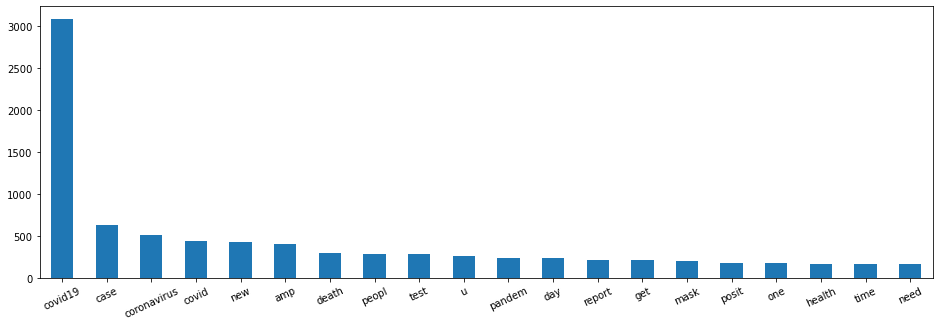

In [298]:
# Graph the more used word
words_sum_max = words_sum.head(20)

plt.figure(figsize=(16,5))
words_sum_max.plot.bar(rot=25)

In [204]:
!pip install Levenshtein

In [253]:
df['processed_text']

50143     [analyz, school, reopen, detail, wilton, boe, ...
52558     [nice, satmetrix, benchmark, find, contact, ce...
3866      [coronawatch, total, confirm, case, case, cure...
67077     [xr, f, often, becam, way, big, quick, none, u...
153918    [america, disgruntl, employe, donald, trump, t...
                                ...                        
114102    [karamjit, absolut, right, talk, role, local, ...
67848     [un, chief, say, one, billion, student, affect...
142615    [follow, gay, darceyandstacey, pvalley, 90dayf...
61053           [break, news, met, gm, brodi, van, wagenen]
68630     [horribl, stayhomesavesl, wearadamnmask, socia...
Name: processed_text, Length: 5373, dtype: object

In [205]:
import networkx as nx
import Levenshtein
import random
import itertools 

In [206]:
def compare(tweet1, threshold=0.7):
    # compare tweets using Levenshtein distance (or whatever string comparison metric) 
    matches = df['text'].apply(lambda tweet2: (Levenshtein.ratio(tweet1, tweet2) >= threshold))

    # get positive matches
    matches = matches[matches].index.tolist()

    # convert to list of tuples
    return [*zip(iter(matches[:-1]), iter(matches[1:]))]

# create graph objects
nodes = df.index.tolist()
edges = [*itertools.chain(*df["text"].apply(compare))]

# create graphs
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# get connected component indexes
grouped_indexes = [*nx.connected_components(G)]

# get a random choice index from each group
filtered_indexes = [random.choice([*_]) for _ in grouped_indexes]

df.loc[filtered_indexes]

,user_name,text,hashtags,is_retweet,processed_text
50143,GoodMorningWilton,"Analyzing School Reopening Details, Wilton BOE...",NaN,False,"[analyz, school, reopen, detail, wilton, boe, ..."
52558,Mitchel Bell,NICE Satmetrix Benchmark finds 57% of contact ...,NaN,False,"[nice, satmetrix, benchmark, find, contact, ce..."
3866,PIB India,"#CoronaWatch\n\n◾ 13,36,861 total confirmed ca...",['CoronaWatch'],False,"[coronawatch, total, confirm, case, case, cure..."
67077,Daniel Mumby,"""XR f***s up so often because we became way to...",NaN,False,"[xr, f, often, becam, way, big, quick, none, u..."
153918,Jimmy Kokinakes,@realDonaldTrump America's most DISGRUNTLED EM...,['COVID19'],False,"[america, disgruntl, employe, donald, trump, t..."
...,...,...,...,...,...
114102,Dan Male,Karamjit is absolutely right to talk about the...,['NHS'],False,"[karamjit, absolut, right, talk, role, local, ..."
67848,The New Indian Express,UN chief says over one billion students are af...,['COVID19'],False,"[un, chief, say, one, billion, student, affect..."
142615,Diamond Q,Follow or you gay 👀 #DarceyAndStacey #PValley ...,"['DarceyAndStacey', 'PValley', '90DayFianceHap...",False,"[follow, gay, darceyandstacey, pvalley, 90dayf..."
61053,Richard herlihy,@L5Roby @ChristianDMZ @andifasano @meliswein @...,['Mets'],False,"[break, news, met, gm, brodi, van, wagenen]"
